In [14]:
import re
from IPython.display import Image

with open("in24.txt", "r") as f:
    data = f.read()
    init_state = re.findall(r"[a-z]\d+: \d", data)
    logic = re.findall(r"[a-z0-9]+ (?:AND|XOR|OR) [a-z0-9]+ -> [a-z0-9]+", data)

rstate = dict()
adj = dict()
out = set()

for line in logic:
    for r in re.findall(r"[a-z0-9]+", line):
        rstate[r] = -1
        if r[0] == 'z':
            out.add(r)

for line in logic:
    temp = re.findall(r"[a-z0-9]+", line)
    operator = re.findall(r"AND|XOR|OR", line)
    adj[temp[2]] = (temp[0], temp[1], operator[0])

for s in init_state:
    s = s.split()
    rstate[s[0][:-1]] = int(s[1])

revadj = {}
for l in logic:
    temp = l.split()
    revadj[(frozenset((temp[0], temp[2])), temp[1])] = temp[-1]

n = len(out)
c = [{'c':'', 't1':'', 't2':'', 't3':''} for _ in range(n)]

for i in range(n):
    if i == 0:
        c[1]['c'] = revadj[(frozenset(("x00", "y00")), "AND")]
    else:
        z = "z" + f"{i}".rjust(2, '0')
        x = "x" + f"{i}".rjust(2, '0')
        y = "y" + f"{i}".rjust(2, '0')
        temp = adj[z]
        if temp[2] != "XOR":
            print("Weird " + z)
            continue
        temp0 = adj[temp[0]]
        temp1 = adj[temp[1]]
        if temp1[2] == "XOR":
            temp0, temp1 = temp1, temp0
            temp = (temp[1], temp[0], temp[2])
        if temp0[2] != "XOR":
            print(f"Weird here {temp[0]}")
            continue
        c[i]['t1'] = temp[0]
        if c[i]['c'] != '':
            if c[i]['c'] != temp[1]:
                print(f"Weird {c[i]['c']}")
                continue
        else:
            c[i]['c'] = temp[1]
        
        if (frozenset((temp[0], temp[1])), "AND") not in revadj:
            print(f"Weird {temp[0]} {temp[1]}")
            continue
        
        tempc = revadj[(frozenset((temp[0], temp[1])), "AND")]
        tempd = revadj[(frozenset((x, y)), "AND")]

        c[i]['t2'] = tempc
        c[i]['t3'] = tempd

        if (frozenset((tempc, tempd)), "OR") not in revadj:
            print(f"Weird cd {tempc} {tempd}")
            continue
        tempe = revadj[(frozenset((tempc, tempd)), "OR")]
        c[i+1]['c'] = tempe

url = "https://upload.wikimedia.org/wikipedia/commons/5/57/Fulladder.gif"
Image(url=url)

Weird z45


In [15]:
c[31]['c']

'''
Manually Calculated
rkf z09
jgb z20
vcg z24
rvc rrs

jgb rkf rrs rvc vcg z09 z20 z24 
jgb,rkf,rrs,rvc,vcg,z09,z20,z24


y20 XOR x20 -> qkq
qkq AND stj -> z20
stj XOR qkq -> jgb
x20 AND y20 -> hkt


y24 AND x24 -> njq
y24 XOR x24 -> tnm
kkp
kkp AND tnm -> jnh
tnm XOR kkp -> vcg
jnh OR njq -> z24

x31 AND y31 -> rrs
x31 XOR y31 -> rvc
fqm OR twt -> csf
csf XOR rrs -> z31
csf AND rrs -> pgq
rvc OR pgq -> nsm

'''

'\nManually Calculated\n'

In [ ]:
for i in range(n):
    if i == 0:
        c[1]['c'] = revadj[(frozenset(("x00", "y00")), "AND")]
    else:
        z = "z" + f"{i}".rjust(2, '0')
        x = "x" + f"{i}".rjust(2, '0')
        y = "y" + f"{i}".rjust(2, '0')

        temp1 = revadj[(frozenset((x, y)), "XOR")]

        if (frozenset((temp1, c[i]['c'])), "XOR") not in revadj:
            print(f"Weird {c[i]['c']}")

        temp = adj[z]
        if temp[2] != "XOR":
            print("Weird " + z)
            continue
        temp0 = adj[temp[0]]
        temp1 = adj[temp[1]]
        if temp1[2] == "XOR":
            temp0, temp1 = temp1, temp0
            temp = (temp[1], temp[0], temp[2])
        if temp0[2] != "XOR":
            print(f"Weird here {temp[0]}")
            continue
        c[i]['t1'] = temp[0]
        if c[i]['c'] != '':
            if c[i]['c'] != temp[1]:
                print(f"Weird {c[i]['c']}")
                continue
        else:
            c[i]['c'] = temp[1]
        
        if (frozenset((temp[0], temp[1])), "AND") not in revadj:
            print(f"Weird {temp[0]} {temp[1]}")
            continue
        
        tempc = revadj[(frozenset((temp[0], temp[1])), "AND")]
        tempd = revadj[(frozenset((x, y)), "AND")]

        c[i]['t2'] = tempc
        c[i]['t3'] = tempd

        if (frozenset((tempc, tempd)), "OR") not in revadj:
            print(f"Weird cd {tempc} {tempd}")
            continue
        tempe = revadj[(frozenset((tempc, tempd)), "OR")]
        c[i+1]['c'] = tempe

In [27]:
complement = set(rstate.keys())
for i in union:
    complement.remove(i)
complement_copy = complement.copy()
for i in complement_copy:
    if i[0] == 'x' or i[0] == 'z' or i[0] == 'y':
        complement.remove(i)
complement

{'hkt',
 'hvk',
 'jgb',
 'jnh',
 'njq',
 'pgq',
 'qkq',
 'rkf',
 'rrs',
 'rvc',
 'tnm',
 'wpr'}

In [14]:
'''
y44 AND x44 -> tdt
qpb OR tdt -> z45
'''

['mjh',
 'fhf',
 'kbq',
 'trq',
 'mmc',
 'fww',
 'fwg',
 'qbf',
 'jnn',
 'tcs',
 'whj',
 'pwh',
 'kvb',
 'kfp',
 'bqn',
 'htw',
 'rsp',
 'hrn',
 'jqw',
 'stj',
 'bfp',
 'qtq',
 'hrk',
 'kkp',
 'qgb',
 'qcw',
 'mpd',
 'tff',
 'dcj',
 'ffk',
 'csf',
 'nsm',
 'njd',
 'fsn',
 'wbm',
 'bbq',
 'wmj',
 'wqq',
 'rsg',
 'pst',
 'nfn',
 'qkn',
 'tkv',
 'pjw',
 'z45',
 '']

In [11]:
revadj[(frozenset({'dhk', 'vgh'}), 'OR')]

'kfp'

In [ ]:
brute_force = ('z09', 'z20', 'z24', 'csf')

In [72]:
revadj

{('vgh', 'dhk', 'OR'): 'kfp',
 ('qpb', 'tdt', 'OR'): 'z45',
 ('njd', 'hwt', 'XOR'): 'z33',
 ('y38', 'x38', 'AND'): 'srk',
 ('y25', 'x25', 'AND'): 'sth',
 ('jrw', 'tmm', 'OR'): 'htw',
 ('qkn', 'dvc', 'AND'): 'kff',
 ('x08', 'y08', 'AND'): 'kmm',
 ('dcj', 'wrr', 'AND'): 'jkm',
 ('mmc', 'mdv', 'XOR'): 'z05',
 ('x35', 'y35', 'AND'): 'vss',
 ('x14', 'y14', 'AND'): 'nvj',
 ('fks', 'mgs', 'OR'): 'fww',
 ('jnh', 'njq', 'OR'): 'z24',
 ('mfk', 'pwh', 'XOR'): 'z12',
 ('rbc', 'kgg', 'OR'): 'jqw',
 ('cbm', 'jjn', 'OR'): 'nfn',
 ('x30', 'y30', 'AND'): 'fqm',
 ('x18', 'y18', 'AND'): 'kgg',
 ('x23', 'y23', 'XOR'): 'smg',
 ('y36', 'x36', 'XOR'): 'sfh',
 ('kvb', 'fhp', 'AND'): 'dhk',
 ('y24', 'x24', 'AND'): 'njq',
 ('x20', 'y20', 'AND'): 'hkt',
 ('x36', 'y36', 'AND'): 'dcq',
 ('y17', 'x17', 'AND'): 'wvs',
 ('y09', 'x09', 'XOR'): 'wpr',
 ('tjp', 'tdk', 'OR'): 'trq',
 ('gkq', 'qbf', 'XOR'): 'z08',
 ('fmw', 'ffk', 'AND'): 'twt',
 ('y38', 'x38', 'XOR'): 'ccw',
 ('vss', 'nkn', 'OR'): 'bbq',
 ('x02', 'y02', '

In [58]:
rstate

{'vgh': 0,
 'dhk': 0,
 'kfp': 0,
 'qpb': 0,
 'tdt': 1,
 'z45': 1,
 'njd': 1,
 'hwt': 1,
 'z33': 0,
 'y38': 0,
 'x38': 0,
 'srk': 0,
 'y25': 1,
 'x25': 0,
 'sth': 0,
 'jrw': 1,
 'tmm': 0,
 'htw': 1,
 'qkn': 0,
 'dvc': 0,
 'kff': 0,
 'x08': 0,
 'y08': 0,
 'kmm': 0,
 'dcj': 1,
 'wrr': 1,
 'jkm': 1,
 'mmc': 1,
 'mdv': 1,
 'z05': 0,
 'x35': 0,
 'y35': 0,
 'vss': 0,
 'x14': 1,
 'y14': 1,
 'nvj': 1,
 'fks': 1,
 'mgs': 0,
 'fww': 1,
 'jnh': 0,
 'njq': 1,
 'z24': 1,
 'mfk': 1,
 'pwh': 1,
 'z12': 0,
 'rbc': 1,
 'kgg': 0,
 'jqw': 1,
 'cbm': 0,
 'jjn': 0,
 'nfn': 0,
 'x30': 0,
 'y30': 0,
 'fqm': 0,
 'x18': 0,
 'y18': 1,
 'x23': 1,
 'y23': 0,
 'smg': 1,
 'y36': 1,
 'x36': 1,
 'sfh': 0,
 'kvb': 1,
 'fhp': 0,
 'y24': 1,
 'x24': 1,
 'x20': 0,
 'y20': 0,
 'hkt': 0,
 'dcq': 1,
 'y17': 1,
 'x17': 1,
 'wvs': 1,
 'y09': 0,
 'x09': 1,
 'wpr': 1,
 'tjp': 1,
 'tdk': 0,
 'trq': 1,
 'gkq': 0,
 'qbf': 0,
 'z08': 0,
 'fmw': 0,
 'ffk': 1,
 'twt': 0,
 'ccw': 0,
 'nkn': 0,
 'bbq': 0,
 'x02': 1,
 'y02': 1,
 'rfb': 1,

In [ ]:
import re

with open("in24.txt", "r") as f:
    data = f.read()
    init_state = re.findall(r"[a-z]\d+: \d", data)
    logic = re.findall(r"[a-z0-9]+ (?:AND|XOR|OR) [a-z0-9]+ -> [a-z0-9]+", data)

rstate = dict()
adj = dict()
out = set()

for line in logic:
    for r in re.findall(r"[a-z0-9]+", line):
        rstate[r] = -1
        if r[0] == 'z':
            out.add(r)

for line in logic:
    temp = re.findall(r"[a-z0-9]+", line)
    operator = re.findall(r"AND|XOR|OR", line)
    adj[temp[2]] = (temp[0], temp[1], operator[0])

for s in init_state:
    s = s.split()
    rstate[s[0][:-1]] = int(s[1])

def dfs(r):
    if rstate[r] != -1:
        return rstate[r]
    dep = adj[r]
    r1 = dfs(dep[0])
    r2 = dfs(dep[1])

    if dep[2] == 'XOR':
        rstate[r] = r1 ^ r2
    elif dep[2] == 'OR':
        rstate[r] = r1 | r2
    elif dep[2] == 'AND':
        rstate[r] = r1 & r2
    return rstate[r]

res = 0
for rout in out:
    place = int(rout[1:])
    res += (2**place)*dfs(rout)
print(res)

In [2]:
import graphviz

#create the object
dot = graphviz.Digraph(comment='Example')

#add nodes
dot.node('db1', 'input A')
dot.node('db2', 'input B')
dot.node('db3', 'input C')

dot.node('B', 'transformation', shape = 'box')
dot.node('C', 'output')

for n in ['db1', 'db2', 'db3']:
    dot.edge(n, "B")

dot.edge('B', "C")

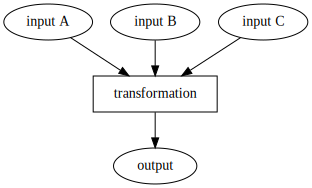

In [3]:
dot